In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import numpy as np

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200609_GNIRS.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200609_GNIRS

## He I 10830

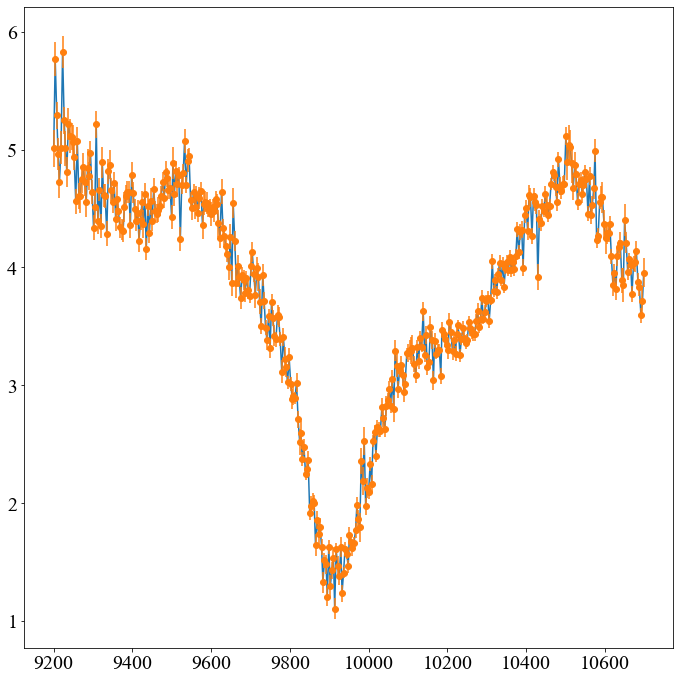

In [4]:
Spec1.plot_line_region(9200, 10700)

## He hvf + Fe II pvf

### Single Fe II line (10500)

294 points within 9400.00 and 10500.00 angstroms.


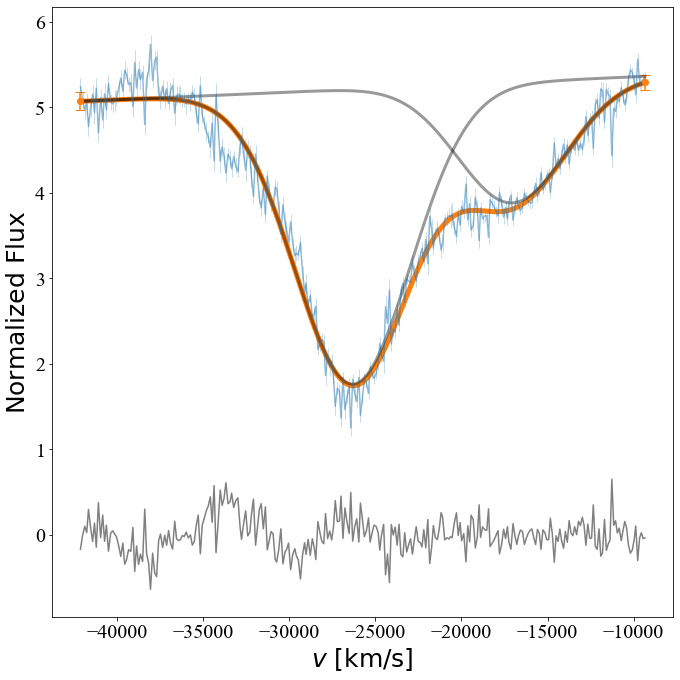

LS estimation:
Velocity 1: -26302 km/s
Velocity 2: -7787 km/s


In [43]:
Spec1.add_line('HeI_10830/FeII1',
               9400,
               10500,
               lines=[[10830], [10500]],
               rel_strength=[[], []])
Spec1.line['HeI_10830/FeII1'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                  -8000, 14, -2000))

Normalize factor = 2.271


100%|██████████████████████████████████████| 3000/3000 [00:28<00:00, 104.15it/s]


MCMC results:
Velocity 1: -26301 pm 46 km/s
Velocity 2: -7790 pm 124 km/s
Normalize factor = 2.271


  8%|██▉                                  | 4000/50000 [00:38<07:18, 104.91it/s]

MCMC results:
Velocity 1: -26301 pm 52 km/s
Velocity 2: -7785 pm 120 km/s


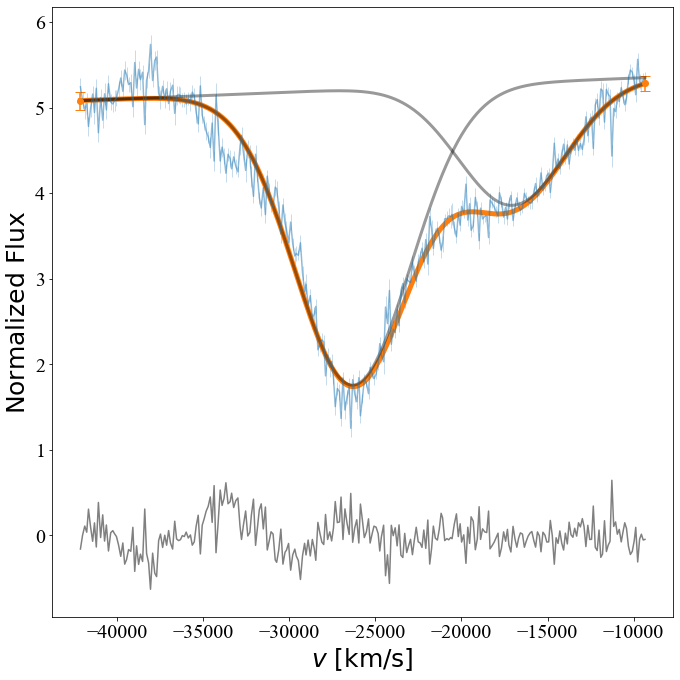

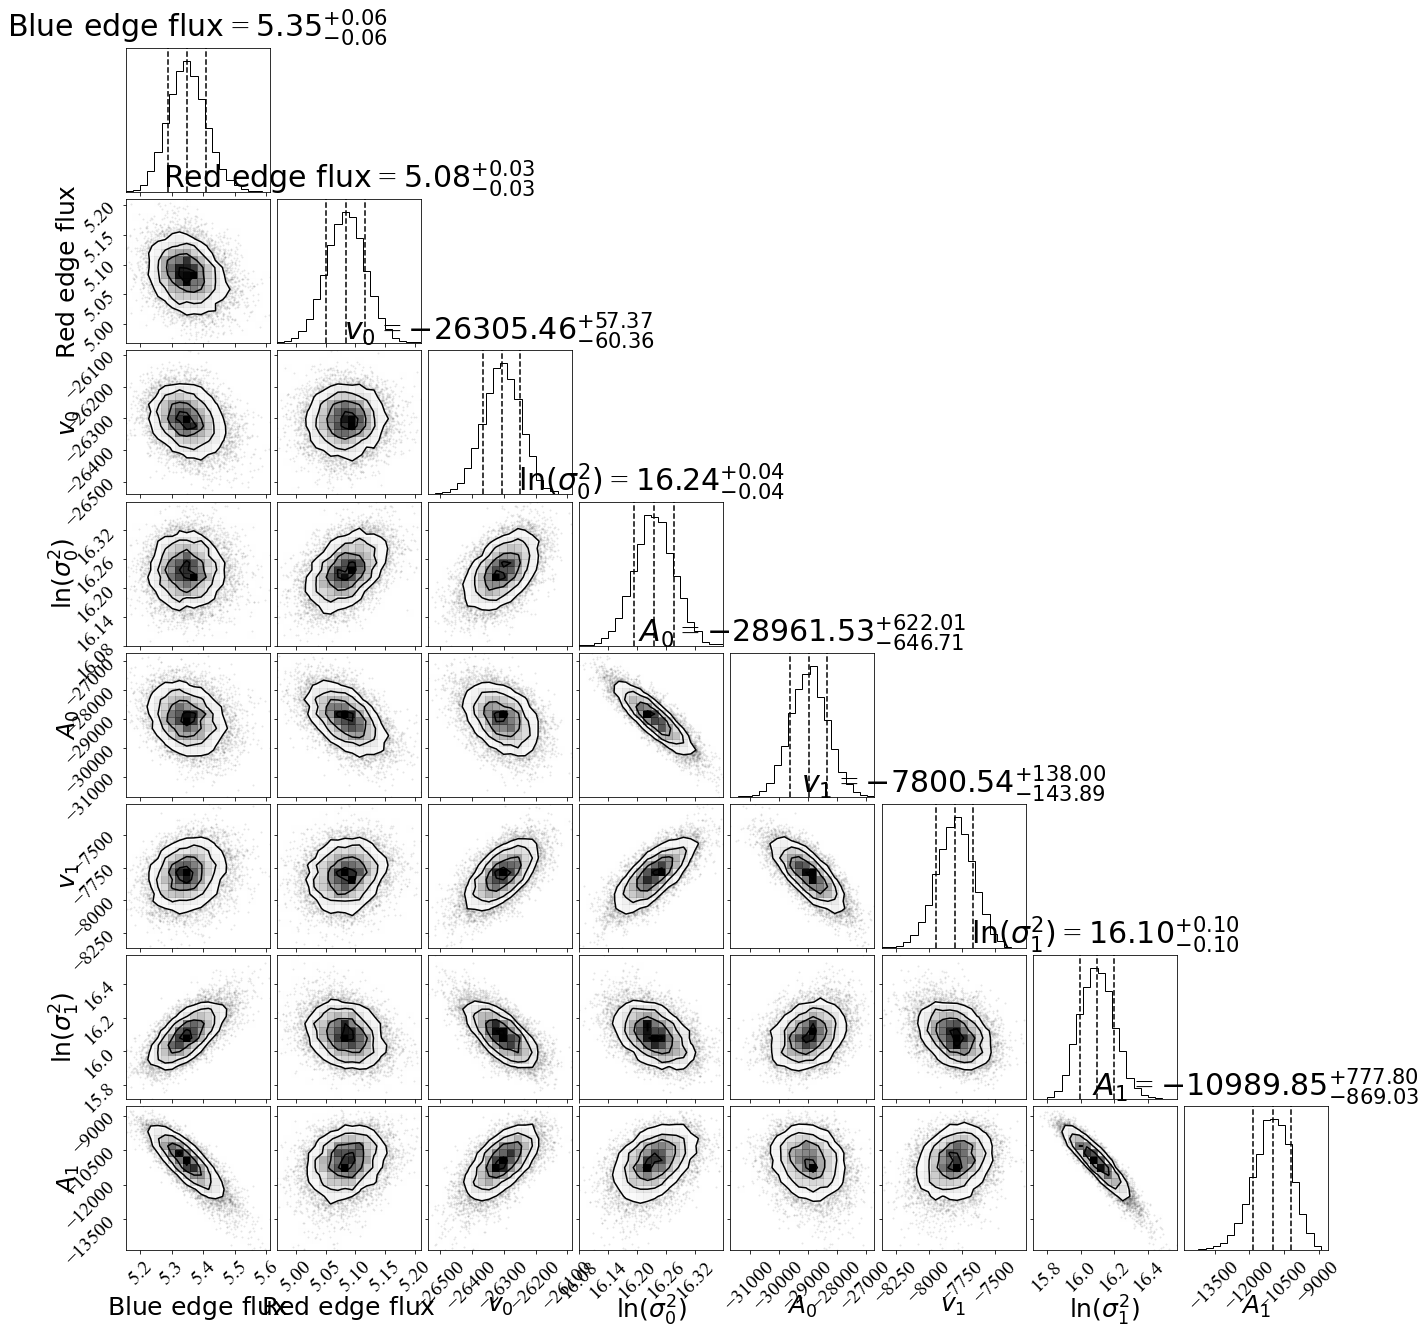

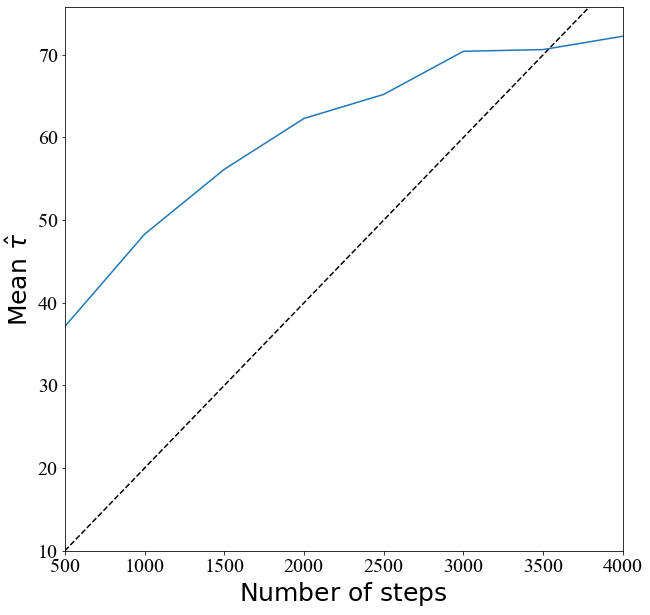

In [46]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII1'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII1'].theta_LS,#[1, 1, -26000, 16, -5000, -8000, 16, -5000],
    normalize_unc=True,
    max_nsteps=3000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII1'].MCMC_sampler(
    mu_prior=[-26000, -8000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/FeII1'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)

### Two Fe II lines

401 points within 9000.00 and 10500.00 angstroms.


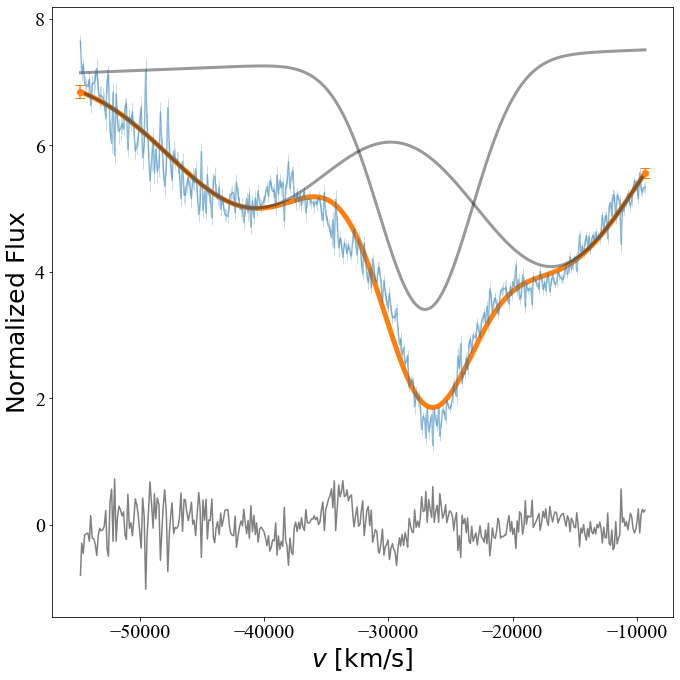

LS estimation:
Velocity 1: -27015 km/s
Velocity 2: -7459 km/s


In [40]:
Spec1.add_line('HeI_10830/FeII2',
               9000,
               10500,
               lines=[[10830], [9998, 10500]],
               rel_strength=[[], [1, 1.5]])
               #rel_strength=[[], [0.832, 0.521]])
Spec1.line['HeI_10830/FeII2'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                 -8000, 14, -2000))

Normalize factor = 2.680


100%|███████████████████████████████████████| 3000/3000 [00:32<00:00, 91.25it/s]


MCMC results:
Velocity 1: -27002 pm 41 km/s
Velocity 2: -7543 pm 0 km/s
Normalize factor = 2.680


 13%|████▉                                 | 6500/50000 [01:12<08:08, 89.05it/s]


MCMC results:
Velocity 1: -26990 pm 53 km/s
Velocity 2: -7486 pm 143 km/s


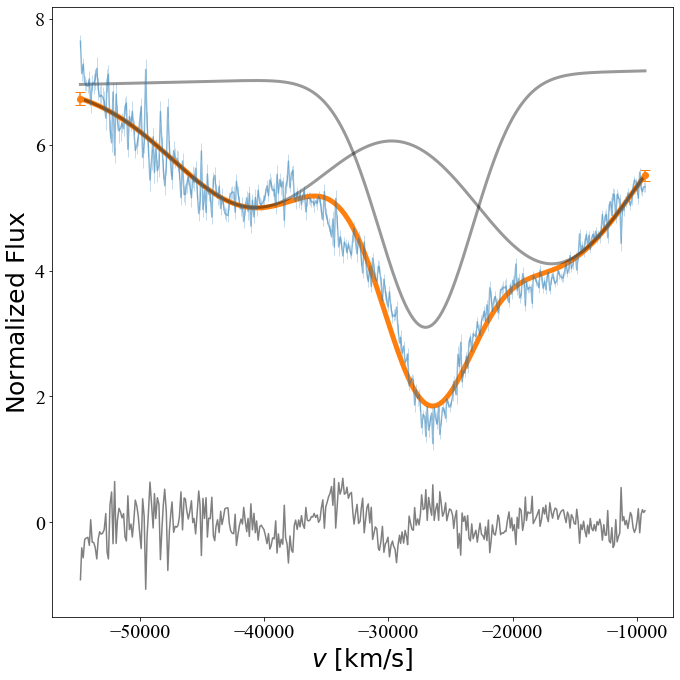

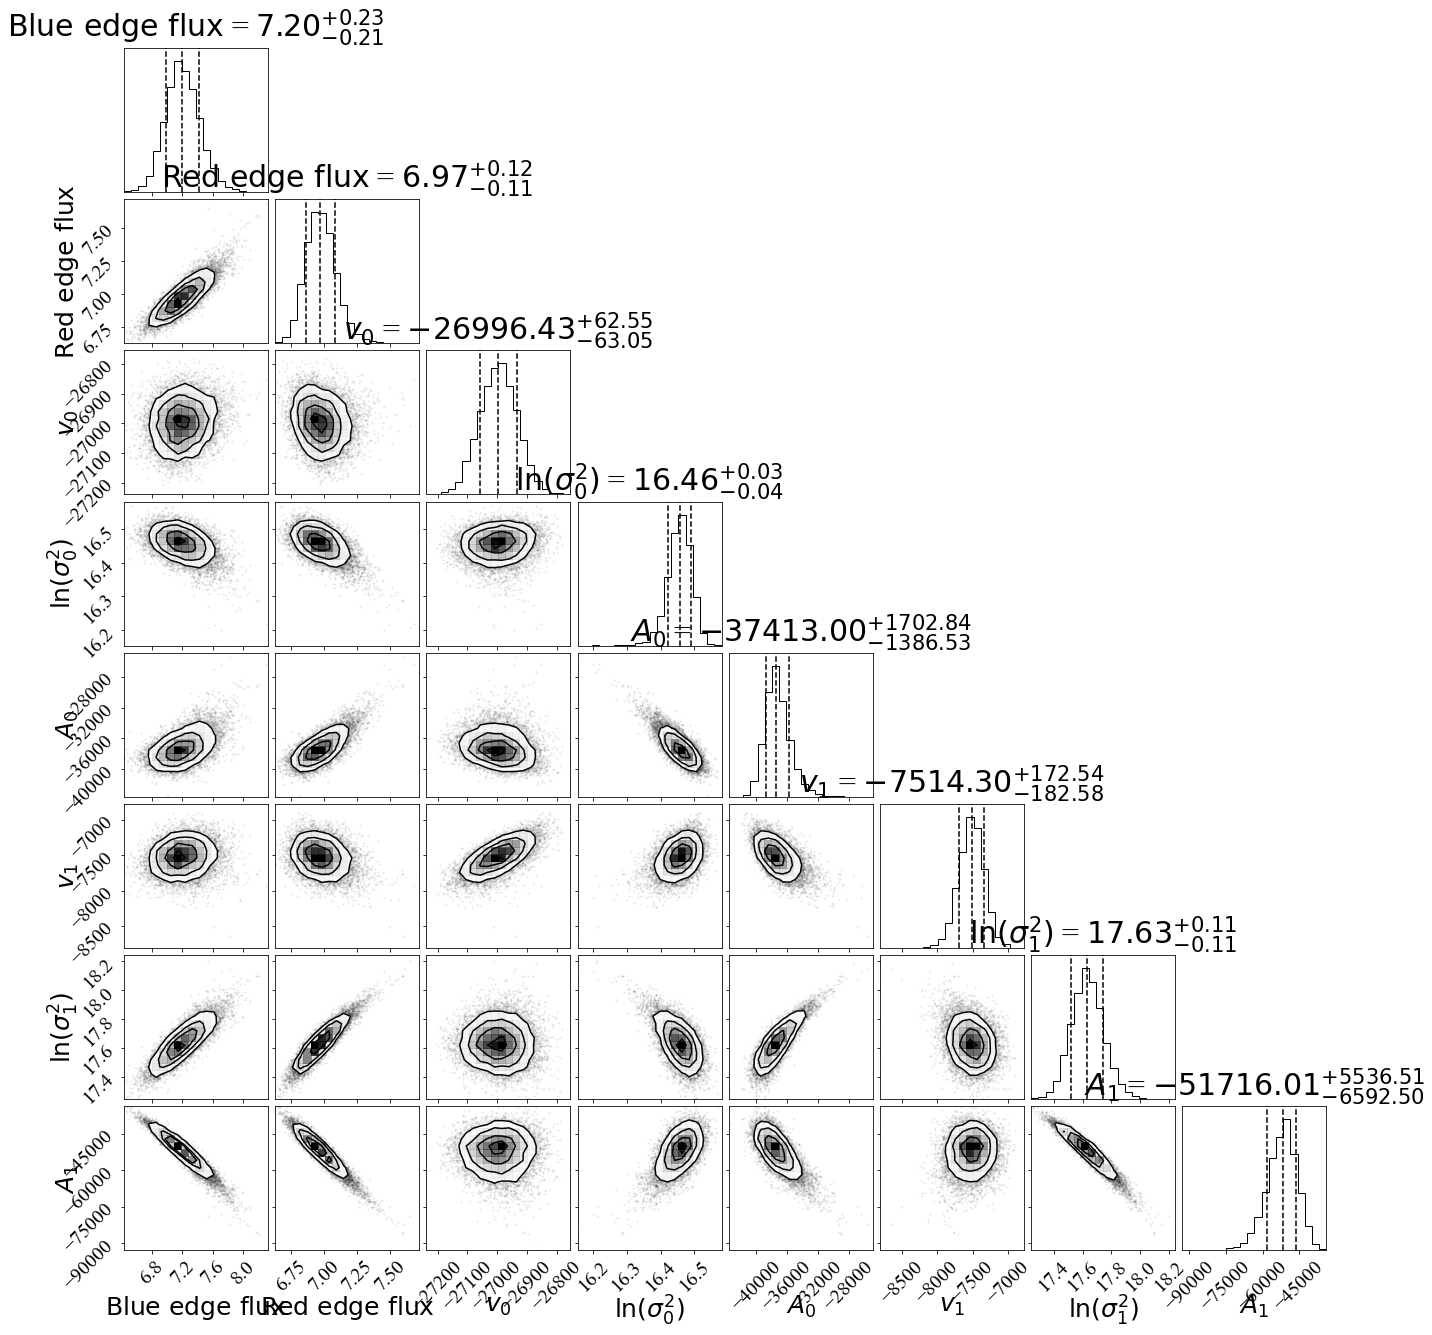

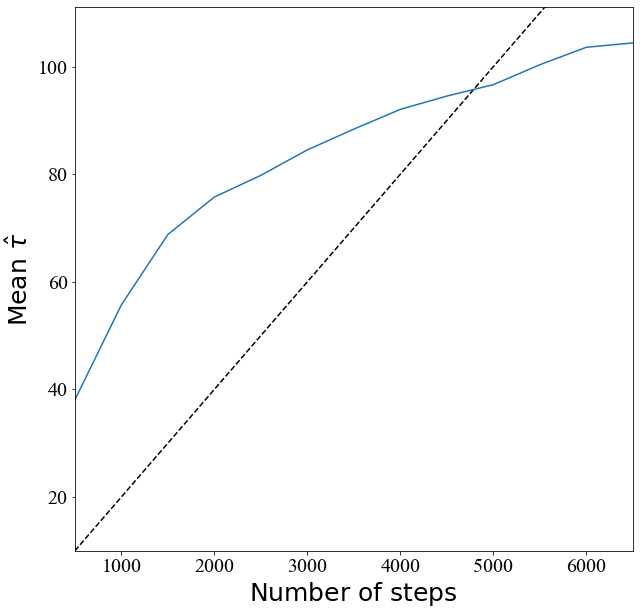

In [45]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII2'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=[5, 5, -28000, 15, -2000, -8000, 14, -2000],
    normalize_unc=True,
    max_nsteps=3000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII2'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    initial=Spec1.line['HeI_10830/FeII2'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)

### Three Fe II lines

In [ ]:
Spec1.add_line('HeI_10830/FeII3',
               9000,
               10600,
               lines=[[10830], [9998, 10500, 10863]],
               rel_strength=[[], [1, 1.5, 1]])
               #rel_strength=[[], [0.832, 0.521, 0.374]])

In [ ]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII3'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII2'].theta_MCMC,
    normalize_unc=False,
    max_nsteps=3000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII3'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    initial=Spec1.line['HeI_10830/FeII3'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)

## He I hvf + He I pvf

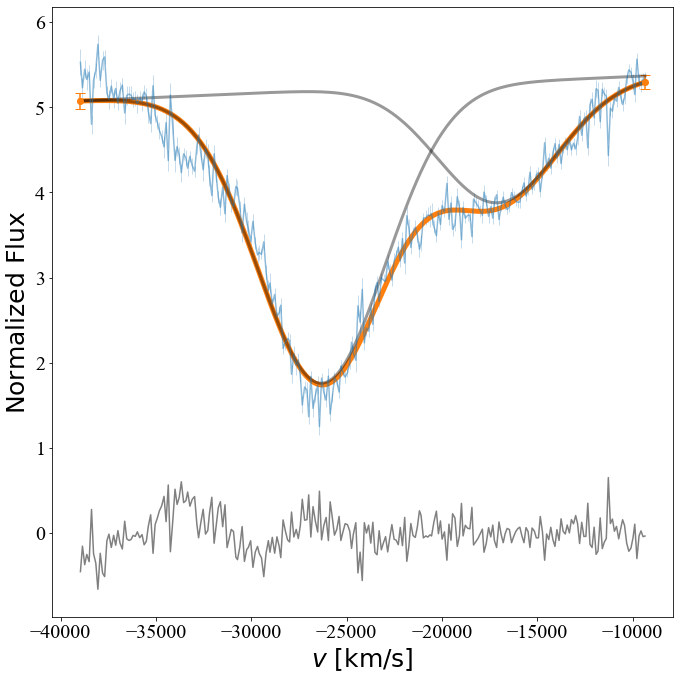

LS estimation:
Velocity 1: -26303 km/s
Velocity 2: -17073 km/s


In [163]:
Spec1.add_line('HeI_10830/HeI_10830',
               9500,
               10500,
               lines=[[10830], [10830]],
               rel_strength=[[1], [1]])
Spec1.line['HeI_10830/HeI_10830'].LS_estimator(guess=(1, 1, -25000, 15, -2000, -15000, 15, -2000))

Normalize factor = 2.320


100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 111.84it/s]


MCMC results:
Velocity 1: -26309 pm 360 km/s
Velocity 2: -17043 pm 2875 km/s
Normalize factor = 2.320


  8%|██▉                                  | 4000/50000 [00:36<07:04, 108.30it/s]

MCMC results:
Velocity 1: -26297 pm 53 km/s
Velocity 2: -17062 pm 124 km/s


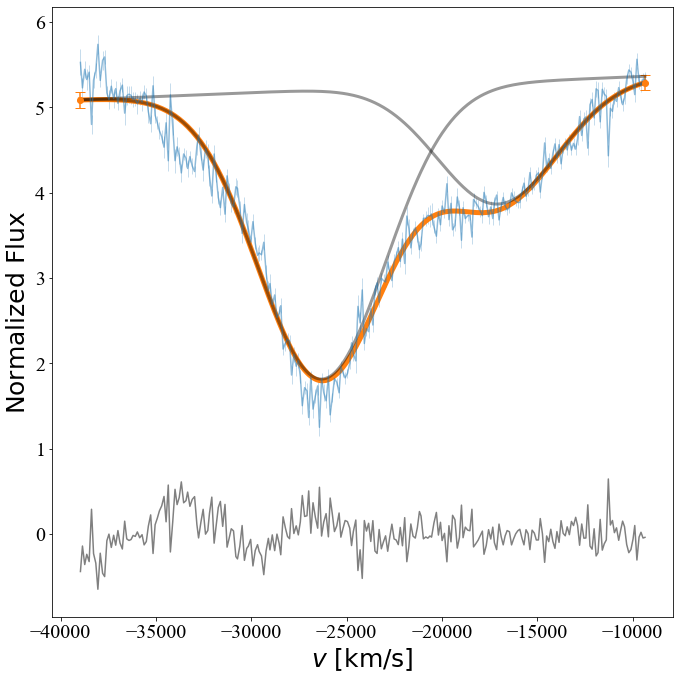

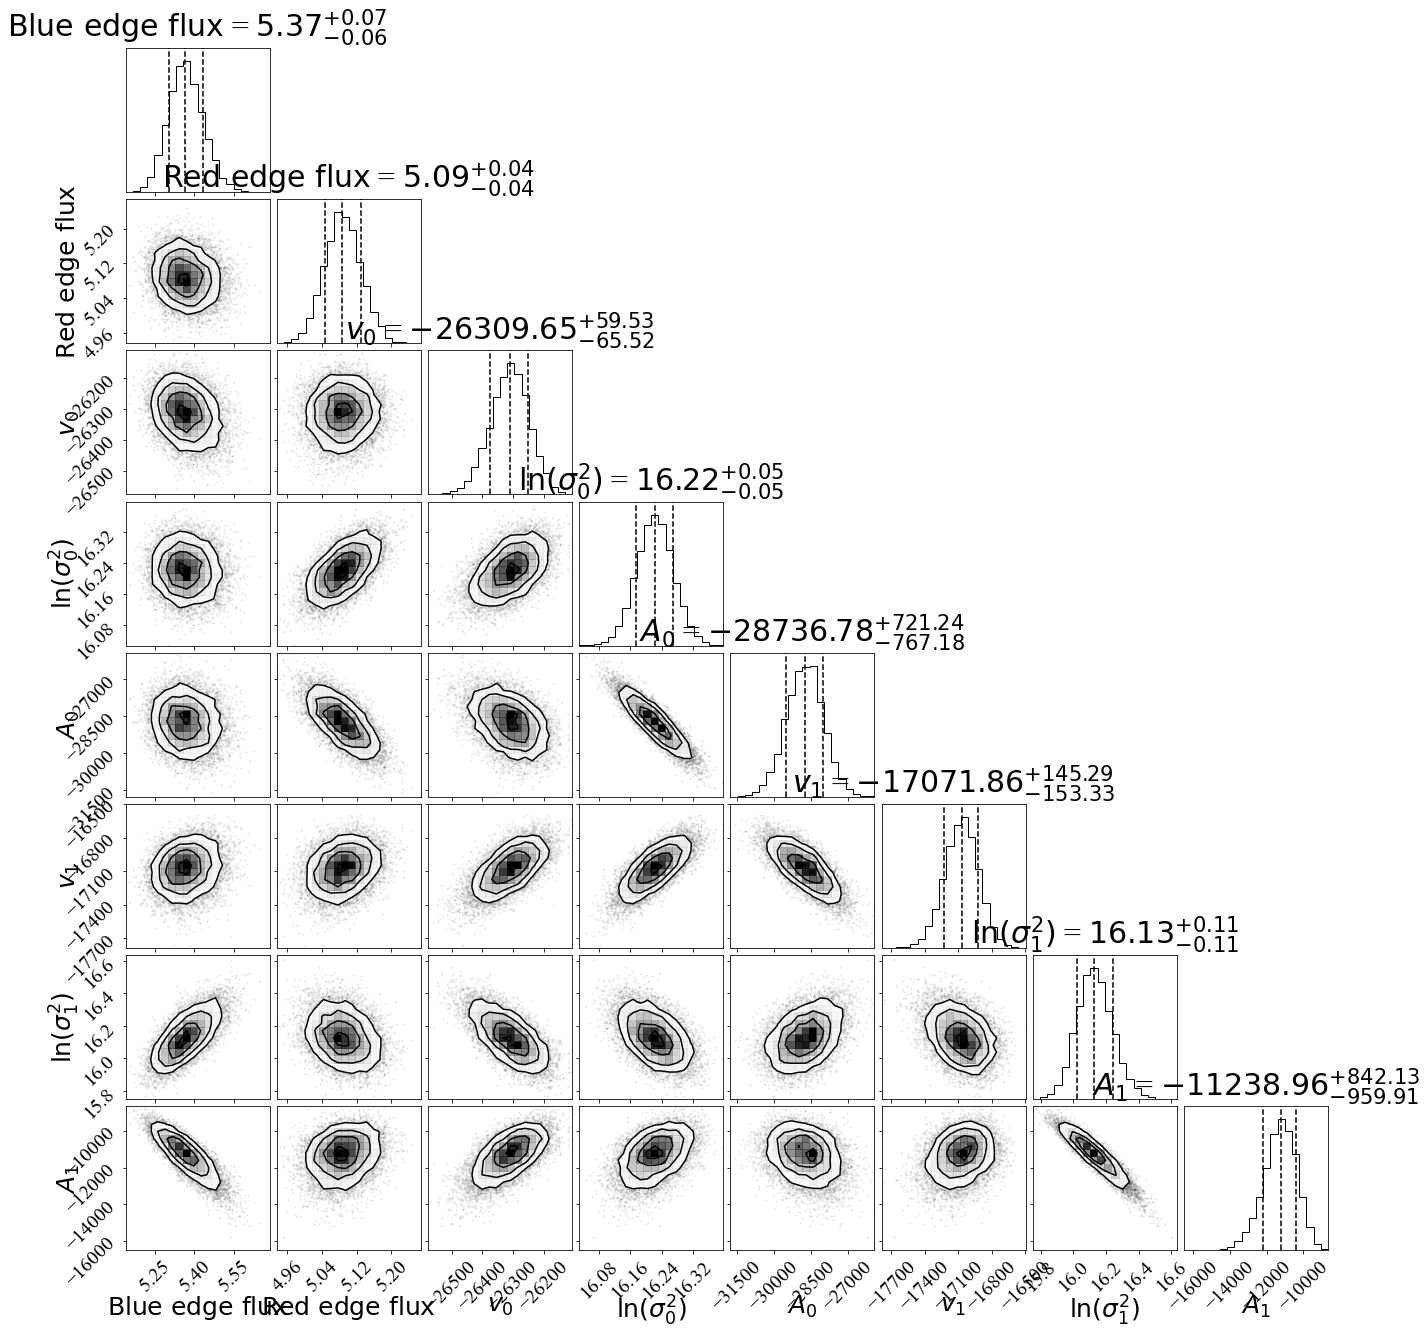

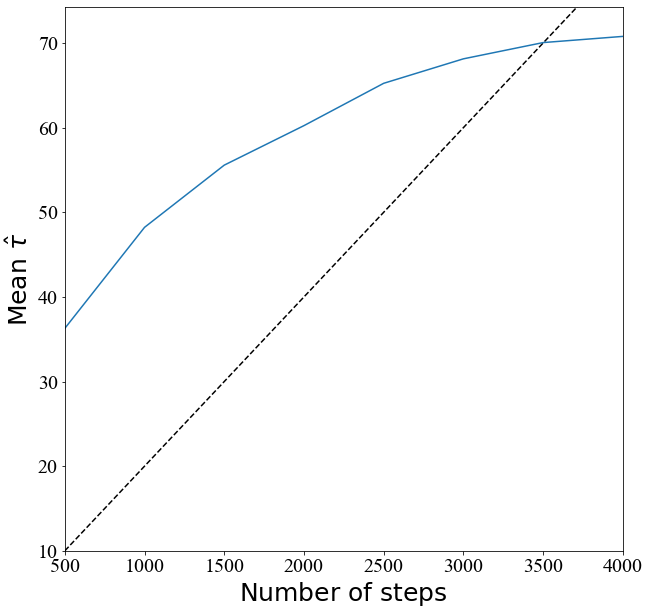

In [176]:
mu1 = -26000
mu2 = -17000
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=[1, 1, -26000, 16, -5000, -17000, 16, -5000],
    normalize_unc=True,
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[-26000, -18000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/HeI_10830'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)

## Mg II 10927

In [73]:
Spec1.add_line('MgII_10927',
               9500,
               10500,
               lines=[[10927], [10927]],
               rel_strength=[[1], [1]])

267 points within 9500.00 and 10500.00 angstroms.


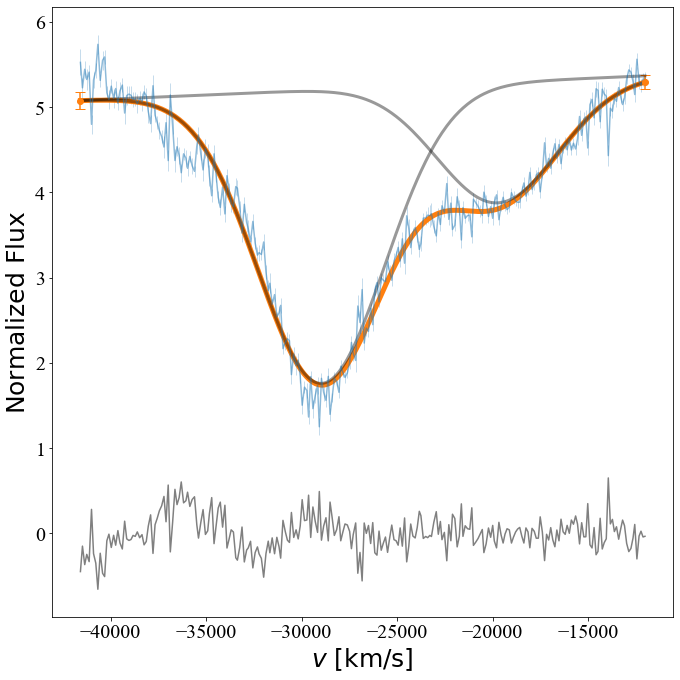

LS estimation:
Velocity 1: -28958 km/s
Velocity 2: -19740 km/s


In [74]:
Spec1.line['MgII_10927'].LS_estimator(guess=(1, 1, -30000, 15, -2000, -25000, 15, -2000))